In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter
# 从sklearn.metrics导入classification_report。
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [78]:
from sklearn.model_selection import train_test_split  
from imblearn.over_sampling import SMOTE

data = pd.read_csv('../input/TC_hubGeneExpr1.csv') 
data.head()
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['ANTXR1', 'TBL1X', 'ITPKB', 'FCGRT', 'AIFM3', 'PLXNB1', 'PDLIM5',
       'CGNL1', 'PALLD', 'STON2', 'MAGT1', 'LMOD3', 'LOC100128288',
       'LOC399900', 'HIATL2', 'LOC648852', 'LRRC37B2', 'LOC100133516',
       'DUXAP3', 'LOC100128274', 'LOC401098', 'TDRD1', 'LOC648059', 'SHROOM4',
       'QRFPR', 'BLZF1', 'LOC100129094', 'HSPC268', 'LOC653829', 'SLC5A8',
       'LOC647389', 'MBD4', 'LOC646897', 'diagnosis'],
      dtype='object')


In [79]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

lst = []
lst = [col_name for col_name in data.columns]
lst.remove("diagnosis")

for f_name in lst:
    data[f_name] = scaler.fit_transform(data[f_name].values.reshape(-1, 1))
    

In [80]:
    
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

## 不做SMOTE
#sm = SMOTE(random_state=12, ratio = 1.0)
#x, y = sm.fit_sample(X, Y)

In [81]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size=0.3, random_state=100)  


In [82]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [83]:
svc = SVC(random_state=42)
svc.fit(x_train, y_train)

SVC(random_state=42)

In [84]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import confusion_matrix

In [85]:
## 01 metrices
#TPR = tp/(tp+fn)
#FPR = fp/(fp+tn)
#Precision = tp/(tp+fp)
#Recall = tp/(tp+fn)
#F_1_score = 2*Precision*Recall/(Precision+Recall)
#Sensitivity = tp/(tp+fp)
#Specific = tp/(tp+fp)

In [86]:
classifier_metrics_dict = {
    "SVM" : {},
    "RandomForest"  : {},
    "ExtraTrees" : {},
     "AdaBoost" : {},
     "GradientBoosting" : {},
     "MLP" : {},
     "KNeighbors" : {},
     "LogisticRegression" : {},
     "LinearDiscriminant" : {},
    "GaussianNB"  : {}
}
print (classifier_metrics_dict)

{'SVM': {}, 'RandomForest': {}, 'ExtraTrees': {}, 'AdaBoost': {}, 'GradientBoosting': {}, 'MLP': {}, 'KNeighbors': {}, 'LogisticRegression': {}, 'LinearDiscriminant': {}, 'GaussianNB': {}}


In [87]:
## define a function for classifier matrics
#y_true = y[test]
#y_pred = classifier.predict(X[test])
def classfier_report_custom (y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    Precision = tp/(tp+fp)
    Recall = tp/(tp+fn)
    F_1_score = 2*Precision*Recall/(Precision+Recall)
    PPV = tp/(tp+fp)
    NPV = tn/(fn+tn)
    Sensitivity = tp/(tp+fn)
    Specificity = tp/(tp+fp)
    
    classifier_metrics_list = [F_1_score,PPV,NPV,Sensitivity, Specificity]
    classifier_metrics_list = [round(i,2) for i in classifier_metrics_list]
    return  classifier_metrics_list
#l = classfier_report_custom (y_true, y_pred)
#print (l)

## define a function for output classifier matrics
def outputMetricsFile(outputFile, headline, classifier_metrics_dict):
    with open (outputFile, "w") as f_out:
        f_out.write(headline)
        for key in classifier_metrics_dict:
            for n in classifier_metrics_dict[key]:
                content = key + ","+ str(n) +","+",".join(str(i) for i in classifier_metrics_dict[key][n])+"\n"
                #print (content)
                f_out.write(content)

Automatically created module for IPython interactive environment


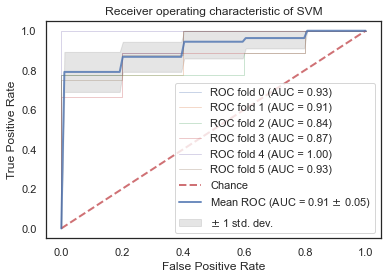

Automatically created module for IPython interactive environment


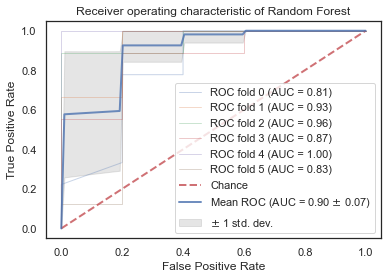

Automatically created module for IPython interactive environment


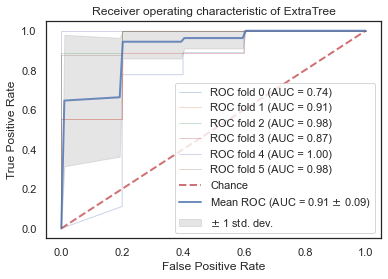

Automatically created module for IPython interactive environment


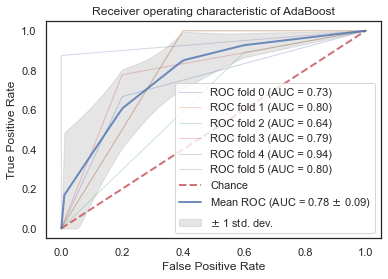

Automatically created module for IPython interactive environment


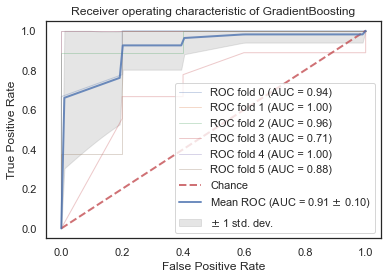

Automatically created module for IPython interactive environment


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

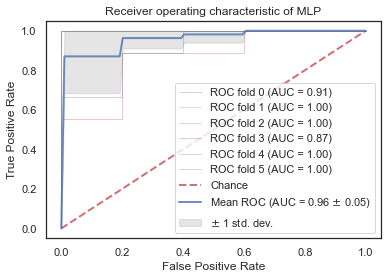

Automatically created module for IPython interactive environment


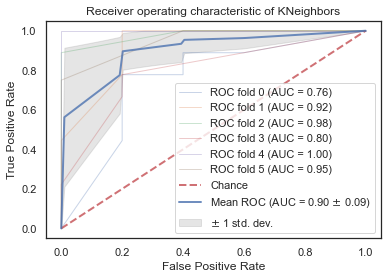

Automatically created module for IPython interactive environment


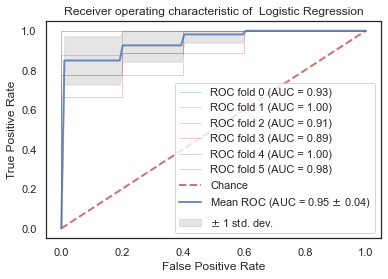

Automatically created module for IPython interactive environment


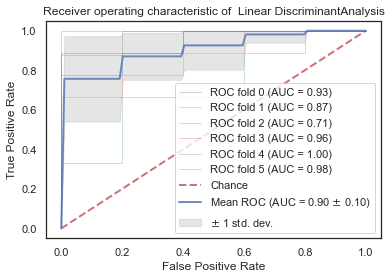

Automatically created module for IPython interactive environment


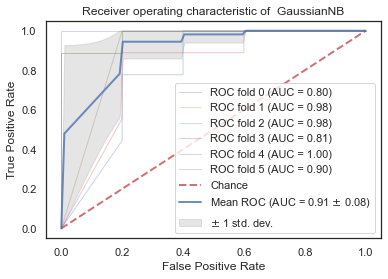

In [88]:
random_state=42
dtc = DecisionTreeClassifier(random_state=random_state)

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold


# #############################################################################
# Classification and ROC analysis


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
       
    ## output the classifier metrics
    y_true = y[test]
    y_pred = classifier.predict(X[test])
    classifier_metrics_dict["SVM"][i]=classfier_report_custom (y_true, y_pred)
    
    

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic of SVM")
ax.legend(loc="lower right")
plt.show()

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold


# #############################################################################
# Classification and ROC analysis


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)

#classifier = svm.SVC(kernel='linear', probability=True,random_state=random_state)

classifier = RandomForestClassifier(random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
       
    ## output the classifier metrics
    y_true = y[test]
    y_pred = classifier.predict(X[test])
    classifier_metrics_dict["RandomForest"][i]=classfier_report_custom (y_true, y_pred)
    
    

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

#from IPython.core.pylabtools import figsize # import figsize
#figsize(16, 16) 
#plt.rcParams['savefig.dpi'] = 300
#plt.rcParams['figure.dpi'] = 300 

ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic of Random Forest")
#plt.tick_params(labelsize=23)


ax.legend(loc="lower right")
#plt.axis('off')
#plt.savefig('.', dpi=300) 
plt.show()


print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold


# #############################################################################
# Classification and ROC analysis


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)

#classifier = svm.SVC(kernel='linear', probability=True,random_state=random_state)

classifier = (ExtraTreesClassifier(random_state=random_state))

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
       
    ## output the classifier metrics
    y_true = y[test]
    y_pred = classifier.predict(X[test])
    classifier_metrics_dict["ExtraTrees"][i]=classfier_report_custom (y_true, y_pred)
    
    

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

#from IPython.core.pylabtools import figsize # import figsize
#figsize(16, 16) 
#plt.rcParams['savefig.dpi'] = 300
#plt.rcParams['figure.dpi'] = 300 

ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic of ExtraTree")
#plt.tick_params(labelsize=23)


ax.legend(loc="lower right")
#plt.axis('off')
#plt.savefig('.', dpi=300) 
plt.show()

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold


# #############################################################################
# Classification and ROC analysis


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)

#classifier = svm.SVC(kernel='linear', probability=True,random_state=random_state)

classifier = AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
       
    ## output the classifier metrics
    y_true = y[test]
    y_pred = classifier.predict(X[test])
    classifier_metrics_dict["AdaBoost"][i]=classfier_report_custom (y_true, y_pred)
    
    
    

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

#from IPython.core.pylabtools import figsize # import figsize
#figsize(16, 16) 
#plt.rcParams['savefig.dpi'] = 300
#plt.rcParams['figure.dpi'] = 300 

ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic of AdaBoost")
#plt.tick_params(labelsize=23)


ax.legend(loc="lower right")
#plt.axis('off')
#plt.savefig('.', dpi=300) 
plt.show()

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold


# #############################################################################
# Classification and ROC analysis


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)

#classifier = svm.SVC(kernel='linear', probability=True,random_state=random_state)

classifier = GradientBoostingClassifier(random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
       
    ## output the classifier metrics
    y_true = y[test]
    y_pred = classifier.predict(X[test])
    classifier_metrics_dict["GradientBoosting"][i]=classfier_report_custom (y_true, y_pred)
    
    

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

#from IPython.core.pylabtools import figsize # import figsize
#figsize(16, 16) 
#plt.rcParams['savefig.dpi'] = 300
#plt.rcParams['figure.dpi'] = 300 

ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic of GradientBoosting")
#plt.tick_params(labelsize=23)


ax.legend(loc="lower right")
#plt.axis('off')
#plt.savefig('.', dpi=300) 
plt.show()

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold


# #############################################################################
# Classification and ROC analysis


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)

#classifier = svm.SVC(kernel='linear', probability=True,random_state=random_state)

classifier = MLPClassifier(random_state=random_state)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
       
    ## output the classifier metrics
    y_true = y[test]
    y_pred = classifier.predict(X[test])
    classifier_metrics_dict["MLP"][i]=classfier_report_custom (y_true, y_pred)
    
    

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

#from IPython.core.pylabtools import figsize # import figsize
#figsize(16, 16) 
#plt.rcParams['savefig.dpi'] = 300
#plt.rcParams['figure.dpi'] = 300 

ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic of MLP")
#plt.tick_params(labelsize=23)


ax.legend(loc="lower right")
#plt.axis('off')
#plt.savefig('.', dpi=300) 
plt.show()

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold


# #############################################################################
# Classification and ROC analysis


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)

#classifier = svm.SVC(kernel='linear', probability=True,random_state=random_state)

classifier = KNeighborsClassifier()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    ## output the classifier metrics
    y_true = y[test]
    y_pred = classifier.predict(X[test])
    classifier_metrics_dict["KNeighbors"][i]=classfier_report_custom (y_true, y_pred)
    
    

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

#from IPython.core.pylabtools import figsize # import figsize
#figsize(16, 16) 
#plt.rcParams['savefig.dpi'] = 300
#plt.rcParams['figure.dpi'] = 300 

ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic of KNeighbors")
#plt.tick_params(labelsize=23)


ax.legend(loc="lower right")
#plt.axis('off')
#plt.savefig('.', dpi=300) 
plt.show()

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold


# #############################################################################
# Classification and ROC analysis


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)

#classifier = svm.SVC(kernel='linear', probability=True,random_state=random_state)

classifier = LogisticRegression(random_state = random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    ## output the classifier metrics
    y_true = y[test]
    y_pred = classifier.predict(X[test])
    classifier_metrics_dict["LogisticRegression"][i]=classfier_report_custom (y_true, y_pred)
    
    
    

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

#from IPython.core.pylabtools import figsize # import figsize
#figsize(16, 16) 
#plt.rcParams['savefig.dpi'] = 300
#plt.rcParams['figure.dpi'] = 300 

ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic of  Logistic Regression")
#plt.tick_params(labelsize=23)


ax.legend(loc="lower right")
#plt.axis('off')
#plt.savefig('.', dpi=300) 
plt.show()

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold


# #############################################################################
# Classification and ROC analysis


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)

#classifier = svm.SVC(kernel='linear', probability=True,random_state=random_state)

classifier = LinearDiscriminantAnalysis()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    ## output the classifier metrics
    y_true = y[test]
    y_pred = classifier.predict(X[test])
    classifier_metrics_dict["LinearDiscriminant"][i]=classfier_report_custom (y_true, y_pred)

    
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

#from IPython.core.pylabtools import figsize # import figsize
#figsize(16, 16) 
#plt.rcParams['savefig.dpi'] = 300
#plt.rcParams['figure.dpi'] = 300 

ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic of  Linear DiscriminantAnalysis")
#plt.tick_params(labelsize=23)


ax.legend(loc="lower right")
#plt.axis('off')
#plt.savefig('.', dpi=300) 
plt.show()

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold


# #############################################################################
# Classification and ROC analysis


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)

#classifier = svm.SVC(kernel='linear', probability=True,random_state=random_state)

classifier = GaussianNB()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    ## output the classifier metrics
    y_true = y[test]
    y_pred = classifier.predict(X[test])
    classifier_metrics_dict["GaussianNB"][i]=classfier_report_custom (y_true, y_pred)
    

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)


ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic of  GaussianNB")
#plt.tick_params(labelsize=23)


ax.legend(loc="lower right")

plt.show()



In [90]:
## output the classifiers metrics
outputFile = "../output/TC_classfiers_metrics.csv"
headline_lst = ["classifier","KFold","F_1_score","PPV","NPV","Sensitivity","Specificity"]
headline = ",".join(str(i) for i in headline_lst)+"\n"
outputMetricsFile(outputFile, headline, classifier_metrics_dict)